# Repetition or Structure? Exploring Color Consistency in Bob Ross Paintings

B1 Team15: Members: Jiaozi Xiao, Junyi Liu, Tianqi Sun, Zixuan Zhu

## 1. Project Objective

Bob Ross paintings are often described as having a highly consistent visual style. In this project, we explore whether that consistency is mainly the result of repeatedly using the same color palettes, or whether it reflects deeper structural patterns in how colors tend to appear together.

Because the dataset contains no predefined style labels, we rely on unsupervised exploratory analysis of high-dimensional binary color representations to investigate similarity, repetition, and structure across paintings.



## 2. Dataset Description
*   Entity: each observation represents one Bob Ross painting
*   Sample size: 403 paintings
*   Features: 18 binary pigment indicators (presence / absence)
*   metadata: title, season, num_colors


## 3. Data Preparation and Representation

In [ ]:
import warnings
warnings.filterwarnings(
    "ignore",
    message=r".*datetime\.datetime\.utcnow\(\) is deprecated.*",
    category=DeprecationWarning
)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
import pandas as pd
file_path = '/content/bob_ross (1).csv'
df = pd.read_csv(file_path)

In [ ]:
print("data size (row, column):", df.shape)

data size (row, column): (403, 27)


In [ ]:
import pandas as pd

bob_ross = pd.read_csv("bob_ross (1).csv")


color_cols = bob_ross.select_dtypes(include="bool")
color_frequency = color_cols.sum().sort_values(ascending=False)
color_frequency.head(10)
(color_frequency / len(bob_ross)).head(10)
color_cols.drop_duplicates().shape


(176, 18)

## 4. Exploratory Data Analysis (EDA)

### 4.1 Color Frequency and Usage Imbalance


In [ ]:
import pandas as pd
import numpy as np

bob_ross = pd.read_csv("bob_ross (1).csv")

non_color_cols = {
    "painting_index", "img_src", "painting_title",
    "season", "episode", "num_colors",
    "youtube_src", "colors", "color_hex"
}

color_cols = [c for c in bob_ross.columns if c not in non_color_cols]

def to_bool(s):
    if s.dtype == bool:
        return s
    return (
        s.astype(str)
         .str.upper()
         .map({"TRUE": True, "FALSE": False, "1": True, "0": False})
         .fillna(False)
         .astype(bool)
    )

X = bob_ross[color_cols].apply(to_bool)

print("Paintings:", X.shape[0])
print("Colors:", X.shape[1])


Paintings: 403
Colors: 18


### 4.2 Palette Diversity and Repetition

In [ ]:
palette_signature = X.apply(
    lambda r: "|".join(X.columns[r.values]),
    axis=1
)

palette_counts = palette_signature.value_counts()

total_paintings = len(palette_signature)
unique_palettes = palette_counts.shape[0]
repeated_paintings = palette_counts[palette_counts > 1].sum()

print("Total paintings:", total_paintings)
print("Unique color combinations:", unique_palettes)
print("Paintings using repeated palettes:", repeated_paintings)
print("Share repeated:", repeated_paintings / total_paintings)


Total paintings: 403
Unique color combinations: 176
Paintings using repeated palettes: 271
Share repeated: 0.6724565756823822


**Key Findings**

Despite 403 paintings, only 176 unique color combinations exist, with approximately two-thirds of paintings
reusing an existing palette. This raises the question of whether stylistic similarity is driven by exact repetition or deeper structure.


### 4.3 Baseline Structure: Near-Universal Colors


In [ ]:
color_frequency = X.sum().sort_values(ascending=False)
color_support = color_frequency / len(X)

print("Top 10 most frequent colors:")
print(color_support.head(10))

print("\nColors used in ≥90% of paintings:")
print(color_support[color_support >= 0.9])


Top 10 most frequent colors:
Titanium_White      0.992556
Alizarin_Crimson    0.942928
Van_Dyke_Brown      0.920596
Cadmium_Yellow      0.858561
Yellow_Ochre        0.811414
Phthalo_Blue        0.801489
Bright_Red          0.796526
Midnight_Black      0.786600
Sap_Green           0.759305
Indian_Yellow       0.724566
dtype: float64

Colors used in ≥90% of paintings:
Titanium_White      0.992556
Alizarin_Crimson    0.942928
Van_Dyke_Brown      0.920596
dtype: float64


**Key Findings**

The near-universal presence of a few pigments establishes a strong baseline structure,
against which meaningful stylistic variation must be assessed.

### 4.4 Color Co-occurrence and Structural Patterns

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

X01 = X.astype(int)

freq_itemsets = apriori(
    X01,
    min_support=0.20,
    use_colnames=True
).sort_values("support", ascending=False)

print("Top frequent itemsets:")
print(freq_itemsets.head(10))


/usr/local/lib/python3.12/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Top frequent itemsets:
      support                                           itemsets
10   0.992556                                   (Titanium_White)
13   0.942928                                 (Alizarin_Crimson)
93   0.937965                 (Alizarin_Crimson, Titanium_White)
11   0.920596                                   (Van_Dyke_Brown)
91   0.915633                   (Van_Dyke_Brown, Titanium_White)
95   0.878412                 (Van_Dyke_Brown, Alizarin_Crimson)
364  0.875931  (Van_Dyke_Brown, Alizarin_Crimson, Titanium_Wh...
2    0.858561                                   (Cadmium_Yellow)
40   0.856079                   (Titanium_White, Cadmium_Yellow)
43   0.831266                 (Alizarin_Crimson, Cadmium_Yellow)


**Key Findings**

Frequent co-occurrence of specific pigment combinations suggests that color usage may follow
implicit structural rules rather than being entirely arbitrary.

#### Rule Strength and Local Structure


In [ ]:
rules = association_rules(
    freq_itemsets,
    metric="lift",
    min_threshold=1.0
).sort_values("lift", ascending=True)

rules[["antecedents", "consequents", "support", "confidence", "lift"]].head(10)


,antecedents,consequents,support,confidence,lift
333054,"(Cadmium_Yellow, Van_Dyke_Brown, Alizarin_Crim...",(Prussian_Blue),0.307692,0.652632,1.000040
334325,(Prussian_Blue),"(Cadmium_Yellow, Alizarin_Crimson, Yellow_Ochr...",0.307692,0.471483,1.000040
336152,"(Cadmium_Yellow, Van_Dyke_Brown, Alizarin_Crim...",(Prussian_Blue),0.307692,0.652632,1.000040
336147,(Prussian_Blue),"(Cadmium_Yellow, Alizarin_Crimson, Titanium_Wh...",0.307692,0.471483,1.000040
336657,(Prussian_Blue),"(Cadmium_Yellow, Van_Dyke_Brown, Alizarin_Crim...",0.307692,0.471483,1.000040
335642,"(Cadmium_Yellow, Alizarin_Crimson, Titanium_Wh...",(Prussian_Blue),0.307692,0.652632,1.000040
334071,(Prussian_Blue),"(Cadmium_Yellow, Van_Dyke_Brown, Alizarin_Crim...",0.307692,0.471483,1.000040
334076,"(Cadmium_Yellow, Alizarin_Crimson, Yellow_Ochr...",(Prussian_Blue),0.307692,0.652632,1.000040
94249,(Sap_Green),"(Alizarin_Crimson, Dark_Sienna, Titanium_White...",0.454094,0.598039,1.000041
92890,"(Alizarin_Crimson, Phthalo_Blue, Dark_Sienna)",(Sap_Green),0.454094,0.759336,1.000041


In [ ]:
white = X["Titanium_White"]

lift_results = {}

for color in X.columns:
    if color == "Titanium_White":
        continue

    p_color = X[color].mean()
    p_both = (white & X[color]).mean()

    lift = p_both / (white.mean() * p_color)
    lift_results[color] = lift

lift_df = (
    pd.Series(lift_results)
      .sort_values(ascending=False)
)

lift_df


,0
Dark_Sienna,1.007500
Liquid_Black,1.007500
Liquid_Clear,1.007500
Phthalo_Blue,1.007500
Phthalo_Green,1.007500
Indian_Red,1.007500
Cadmium_Yellow,1.004588
Yellow_Ochre,1.004419
Midnight_Black,1.004322
Sap_Green,1.004208


Data Check: Total Rows 403, Total Pigments 18
Pigment list analyzed: ['Black_Gesso', 'Bright_Red', 'Burnt_Umber', 'Cadmium_Yellow', 'Dark_Sienna', 'Indian_Red', 'Indian_Yellow', 'Liquid_Black', 'Liquid_Clear', 'Midnight_Black', 'Phthalo_Blue', 'Phthalo_Green', 'Prussian_Blue', 'Sap_Green', 'Titanium_White', 'Van_Dyke_Brown', 'Yellow_Ochre', 'Alizarin_Crimson']
------------------------------------------------------------


/tmp/ipython-input-659484943.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=support_counts.head(15).values, y=support_counts.head(15).index, palette="viridis")


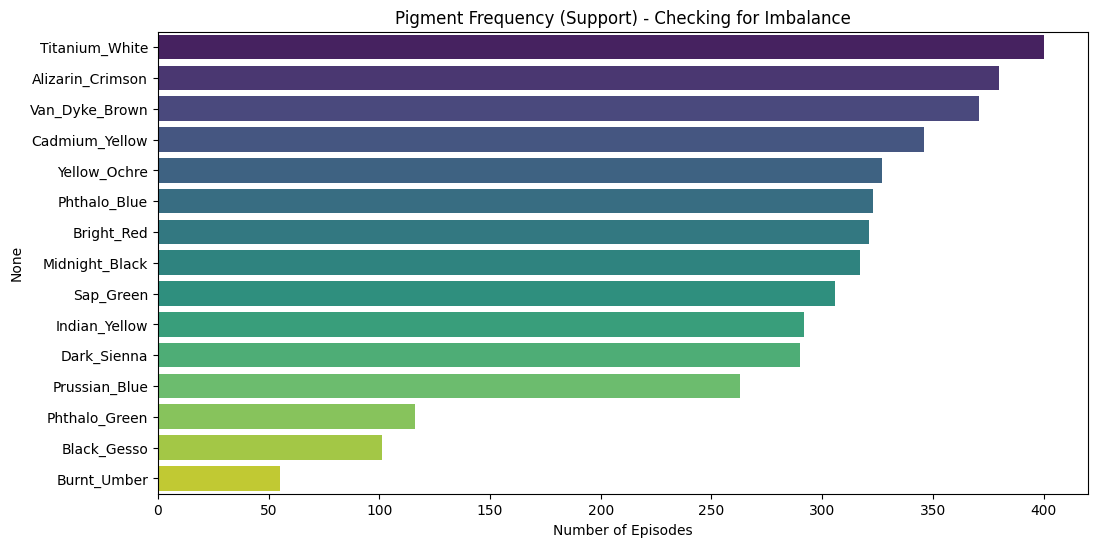

【Key Finding 1: Imbalance】
- Most Common Pigment (Base Color): Titanium_White (appeared 400 times)
- Rarest Pigment (Rare Color): Indian_Red (appeared 1 times)
-> Conclusion: Data is extremely unbalanced; Lift metric is needed for association rule mining.
------------------------------------------------------------


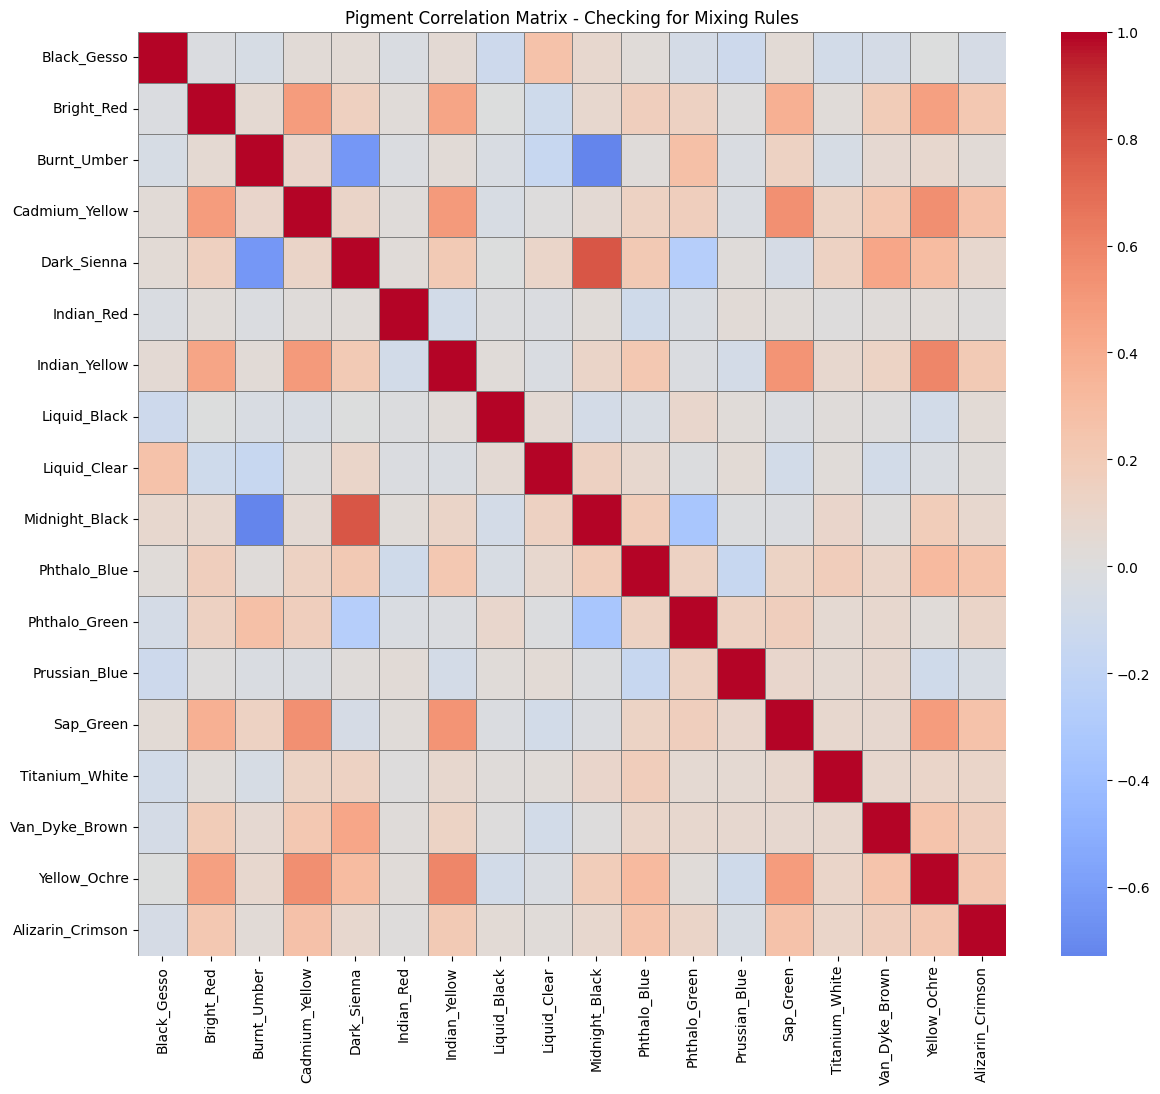

【Key Finding 2: Strong Correlations】
Top 5 Strongest Correlation Pairs (Strongest Co-occurrences):
Midnight_Black  Dark_Sienna       0.780478
Burnt_Umber     Midnight_Black    0.727975
                Dark_Sienna       0.636871
Yellow_Ochre    Indian_Yellow     0.583129
Cadmium_Yellow  Yellow_Ochre      0.550660
dtype: float64
-> Conclusion: Strong correlations exist between dark pigments, suggesting fixed 'color mixing formulas'.
------------------------------------------------------------


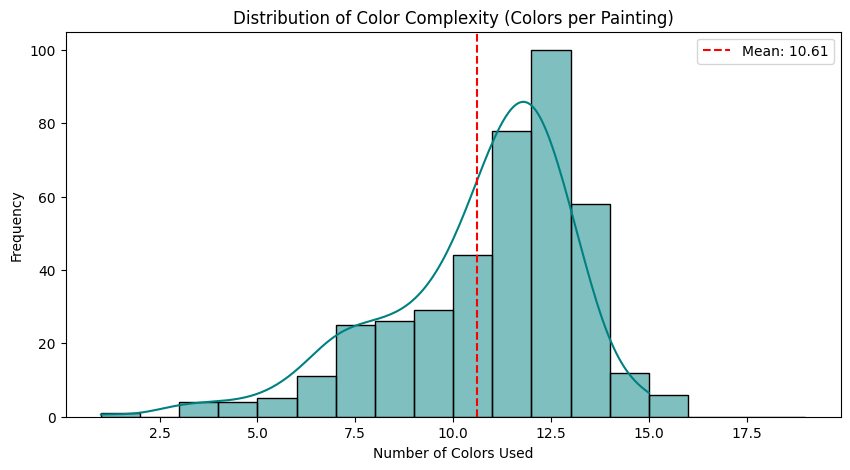

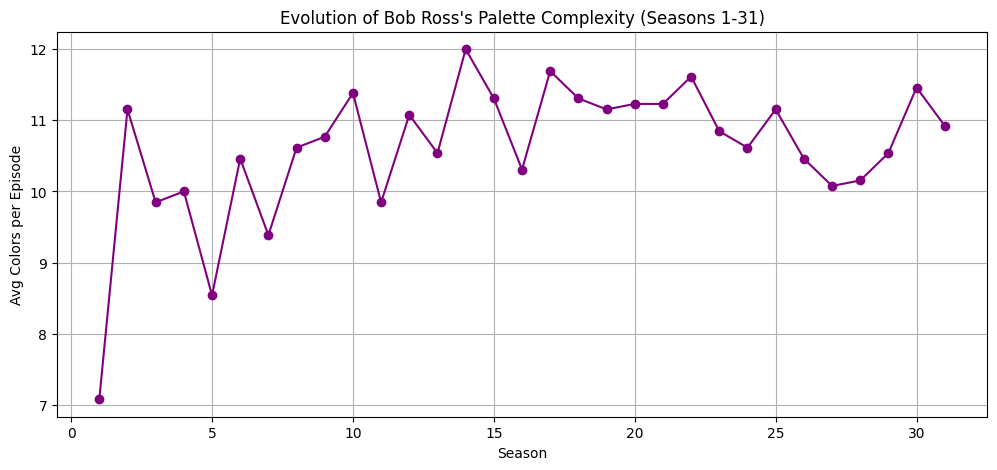

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('bob_ross (1).csv')

pigment_cols = df.iloc[:, 9:].columns.tolist()
df_pigments = df[pigment_cols].astype(int)

print(f"Data Check: Total Rows {df.shape[0]}, Total Pigments {len(pigment_cols)}")
print("Pigment list analyzed:", pigment_cols)
print("-" * 60)

support_counts = df_pigments.sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=support_counts.head(15).values, y=support_counts.head(15).index, palette="viridis")
plt.title("Pigment Frequency (Support) - Checking for Imbalance")
plt.xlabel("Number of Episodes")
plt.show()

print("【Key Finding 1: Imbalance】")
print(f"- Most Common Pigment (Base Color): {support_counts.index[0]} (appeared {support_counts.iloc[0]} times)")
print(f"- Rarest Pigment (Rare Color): {support_counts.index[-1]} (appeared {support_counts.iloc[-1]} times)")
print("-> Conclusion: Data is extremely unbalanced; Lift metric is needed for association rule mining.")
print("-" * 60)

corr_matrix = df_pigments.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, linewidths=0.5, linecolor='gray')
plt.title("Pigment Correlation Matrix - Checking for Mixing Rules")
plt.show()


corr_unstacked = corr_matrix.abs().unstack()
top_correlations = corr_unstacked[corr_unstacked < 1.0].sort_values(ascending=False).drop_duplicates().head(5)

print("【Key Finding 2: Strong Correlations】")
print("Top 5 Strongest Correlation Pairs (Strongest Co-occurrences):")
print(top_correlations)
print("-> Conclusion: Strong correlations exist between dark pigments, suggesting fixed 'color mixing formulas'.")
print("-" * 60)

plt.figure(figsize=(10, 5))
sns.histplot(df['num_colors'], bins=range(1, 20), kde=True, color='teal')
plt.title("Distribution of Color Complexity (Colors per Painting)")
plt.xlabel("Number of Colors Used")
plt.ylabel("Frequency")

plt.axvline(df['num_colors'].mean(), color='red', linestyle='--', label=f'Mean: {df["num_colors"].mean():.2f}')
plt.legend()
plt.show()


season_trend = df.groupby('season')['num_colors'].mean()

plt.figure(figsize=(12, 5))
season_trend.plot(kind='line', marker='o', color='purple')
plt.title("Evolution of Bob Ross's Palette Complexity (Seasons 1-31)")
plt.ylabel("Avg Colors per Episode")
plt.xlabel("Season")
plt.grid(True)
plt.show()

【Painting Counts by Theme】:
Categories
Other        138
Water         84
Mountain      57
Winter        56
Autumn        45
Structure     44
Forest        25
Oval          22
Name: count, dtype: int64
--------------------------------------------------
【Largest Pigment Differences: 'Other' vs 'Winter'】:
Sap_Green         0.615166
Cadmium_Yellow    0.545290
Indian_Yellow     0.507505
Yellow_Ochre      0.462215
Bright_Red        0.365166
dtype: float64
(Larger values indicate stronger differences in pigment usage.)


<Figure size 1400x700 with 0 Axes>

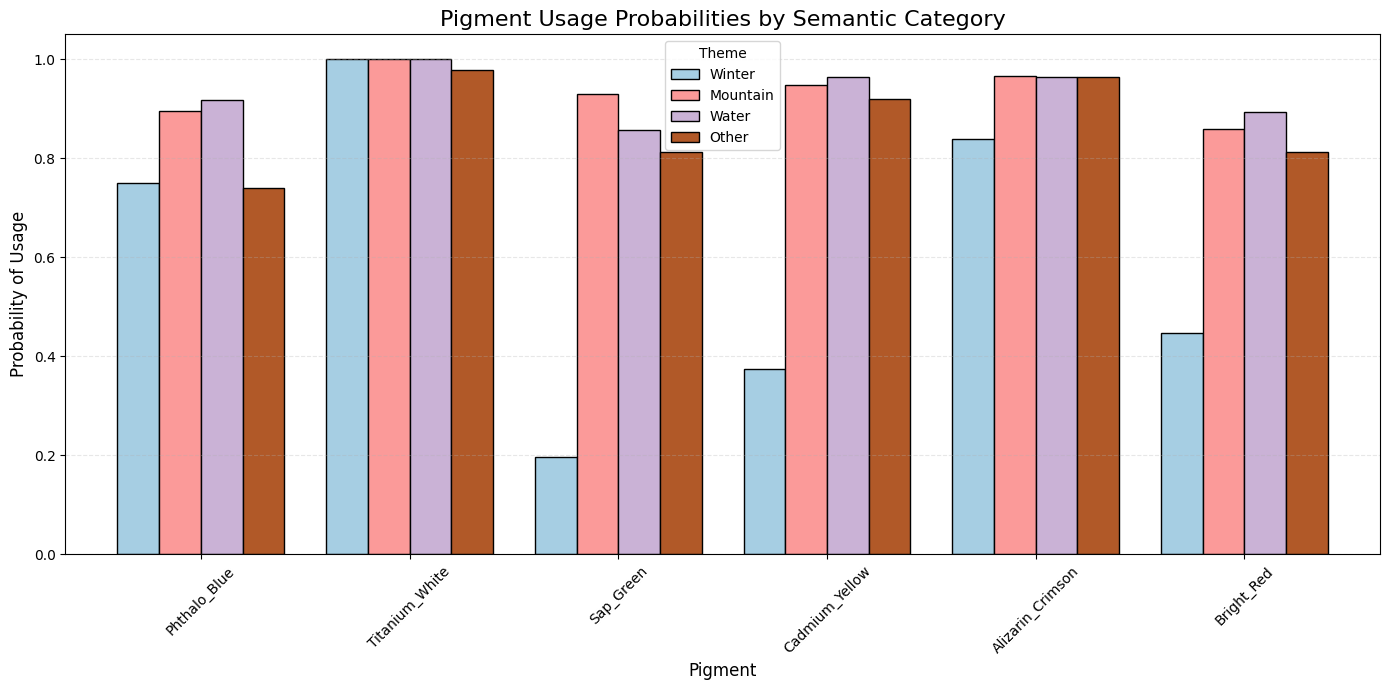

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('bob_ross (1).csv')


pigment_cols = df.iloc[:, 9:].columns.tolist()


categories_dict = {
    'Winter': ['winter', 'snow', 'ice', 'cold', 'frozen'],
    'Mountain': ['mountain', 'mt.', 'mount', 'peak', 'high'],
    'Water': ['lake', 'river', 'stream', 'creek', 'ocean', 'sea', 'waterfall', 'pond', 'beach', 'wave'],
    'Autumn': ['autumn', 'fall'],
    'Forest': ['forest', 'wood', 'tree', 'grove', 'walk'],
    'Structure': ['cabin', 'barn', 'mill', 'bridge', 'house', 'old'],
    'Oval': ['oval']
}

def classify_title(title):
    """
    Input a title string and return a list of all matched categories.
    If nothing matches, return ['Other'].
    """
    title_lower = str(title).lower()
    found_categories = []

    for cat, keywords in categories_dict.items():

        if any(k in title_lower for k in keywords):
            found_categories.append(cat)


    if not found_categories:
        return ['Other']
    return found_categories


df['Categories'] = df['painting_title'].apply(classify_title)


category_counts = df.explode('Categories')['Categories'].value_counts()

print("【Painting Counts by Theme】:")
print(category_counts)
print("-" * 50)


category_palette = {}

for cat in category_counts.index:
    mask = df['Categories'].apply(lambda x: cat in x)
    category_palette[cat] = df.loc[mask, pigment_cols].mean()

palette_df = pd.DataFrame(category_palette)


diff = (palette_df['Other'] - palette_df['Winter']).abs()
top_diffs = diff.sort_values(ascending=False).head(5)

print("【Largest Pigment Differences: 'Other' vs 'Winter'】:")
print(top_diffs)
print("(Larger values indicate stronger differences in pigment usage.)")

cols_to_plot = ['Winter', 'Mountain', 'Water', 'Other']
pigments_to_show = ['Phthalo_Blue', 'Titanium_White', 'Sap_Green', 'Cadmium_Yellow', 'Alizarin_Crimson', 'Bright_Red']

plt.figure(figsize=(14, 7))
palette_df.loc[pigments_to_show, cols_to_plot].plot(
    kind='bar',
    width=0.8,
    figsize=(14, 7),
    edgecolor='black',
    colormap='Paired'
)

plt.title("Pigment Usage Probabilities by Semantic Category", fontsize=16)
plt.ylabel("Probability of Usage", fontsize=12)
plt.xlabel("Pigment", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Theme")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## From EDA to Research Questions


Our exploratory analysis suggests a mix of strong repetition and nontrivial structure. While many paintings reuse identical color palettes, we also observe consistent color co-occurrence patterns that cannot be explained by repetition alone. These observations lead us to the following research questions.


## Research Questions

All of the following questions focus on individual Bob Ross paintings as the unit of analysis, comparing them based on color usage, co-occurrence patterns, and related metadata.


### 1. Color Co-occurrence and Structural Constraints
To what extent do consistent pigment co-occurrence patterns suggest underlying structural constraints in Bob Ross’s color usage, rather than purely improvised choices within the wet-on-wet technique?

### 2. Stylistic Stability Over Time
Across 31 seasons, does the structure of color usage remain relatively stable, or do we observe meaningful shifts that suggest an evolution in Bob Ross’s visual style?

### 3. Baseline Dominance and Rare Exceptions
Given that Titanium White appears in nearly all paintings, how do the rare works that omit this pigment differ in overall color structure, and do these exceptions form a coherent group distinct from the majority?

### 4. Semantic Titles and Visual Structure
Do paintings with similar title themes (such as “Winter” or “Mountain”) exhibit similar color structures, or are painting titles largely independent of underlying pigment composition?

## What Would Surprise Us?

**1. Palette Repetition vs. Structural Similarity**
Given that roughly two-thirds of paintings reuse an existing color palette, we would expect paintings with identical palettes to look similar in color space. It would be surprising if they did not, suggesting that palette reuse alone does not explain stylistic similarity.

**2. Dominant Baseline Colors and Rare Exceptions**
Because Titanium White appears in nearly all paintings, paintings that omit it seem likely to stand out structurally. It would be unexpected if these rare cases looked largely similar to the majority.

**3. Local Co-occurrence Rules vs. Global Structure**
Our EDA shows strong co-occurrence among certain pigment combinations. We would be surprised if these local patterns failed to show up in broader, painting-level structure.

